<a href="https://colab.research.google.com/github/tcarlon94/Recipe_site_traffic/blob/main/Recipe_Site_Traffic.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Data Scientist Professional Practical Exam Submission

**Use this template to write up your summary for submission. Code in Python or R needs to be included.**


## 📝 Task List

Your written report should include both code, output and written text summaries of the following:
- Data Validation:   
  - Describe validation and cleaning steps for every column in the data
- Exploratory Analysis:  
  - Include two different graphics showing single variables only to demonstrate the characteristics of data  
  - Include at least one graphic showing two or more variables to represent the relationship between features
  - Describe your findings
- Model Development
  - Include your reasons for selecting the models you use as well as a statement of the problem type
  - Code to fit the baseline and comparison models
- Model Evaluation
  - Describe the performance of the two models based on an appropriate metric
- Business Metrics
  - Define a way to compare your model performance to the business
  - Describe how your models perform using this approach
- Final summary including recommendations that the business should undertake

*Start writing report here..*

# Import Modules

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns


# Load & Explore Data

In [2]:
#Load data
file_name = 'recipe_site_traffic_2212.csv'
data = pd.read_csv(file_name)

data.head()

,recipe,calories,carbohydrate,sugar,protein,category,servings,high_traffic
0,1,NaN,NaN,NaN,NaN,Pork,6,High
1,2,35.48,38.56,0.66,0.92,Potato,4,High
2,3,914.28,42.68,3.09,2.88,Breakfast,1,NaN
3,4,97.03,30.56,38.63,0.02,Beverages,4,High
4,5,27.05,1.85,0.80,0.53,Beverages,4,NaN


In [3]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 947 entries, 0 to 946
Data columns (total 8 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   recipe        947 non-null    int64  
 1   calories      895 non-null    float64
 2   carbohydrate  895 non-null    float64
 3   sugar         895 non-null    float64
 4   protein       895 non-null    float64
 5   category      947 non-null    object 
 6   servings      947 non-null    object 
 7   high_traffic  574 non-null    object 
dtypes: float64(4), int64(1), object(3)
memory usage: 59.3+ KB


There are a lot of null values in high traffic. We'll inspect this to see if these null values are the non high traffic pages or true null. We have about 50 null values in calories, carbohydrate, sugar, and protein.

In [4]:
data.describe()

,recipe,calories,carbohydrate,sugar,protein
count,947.000000,895.000000,895.000000,895.000000,895.000000
mean,474.000000,435.939196,35.069676,9.046547,24.149296
std,273.519652,453.020997,43.949032,14.679176,36.369739
min,1.000000,0.140000,0.030000,0.010000,0.000000
25%,237.500000,110.430000,8.375000,1.690000,3.195000
50%,474.000000,288.550000,21.480000,4.550000,10.800000
75%,710.500000,597.650000,44.965000,9.800000,30.200000
max,947.000000,3633.160000,530.420000,148.750000,363.360000


There are some extreme values here so we'll need to analyze the outliers.

In [5]:
data.dtypes

,0
recipe,int64
calories,float64
carbohydrate,float64
sugar,float64
protein,float64
category,object
servings,object
high_traffic,object


Servings should be an integer but all other data types seem correct.

# Data Cleaning

## Cleaning df/columns

First, I'll clean the df by setting recipe as the index as it will not be useful for our model.

In [6]:
#Set index to recipe
data.set_index('recipe', inplace=True)

Next, let's update the data type of servings. First, we'll have to trim the text from servings.

In [7]:
#Remove text from servings
import re

data['servings'] = data['servings'].str.replace(r'[a-zA-Z]', '', regex=True)

In [8]:
#Update datatype to int
data['servings'] = data['servings'].astype(int)

data.dtypes

,0
calories,float64
carbohydrate,float64
sugar,float64
protein,float64
category,object
servings,int64
high_traffic,object


In [9]:
#Check summary stats for servings
data['servings'].describe()

,servings
count,947.000000
mean,3.477297
std,1.732741
min,1.000000
25%,2.000000
50%,4.000000
75%,4.000000
max,6.000000


All looks normal for this column.

## Outliers

Since we saw some extreme values, we'll analyze the outliers in our numeric columns

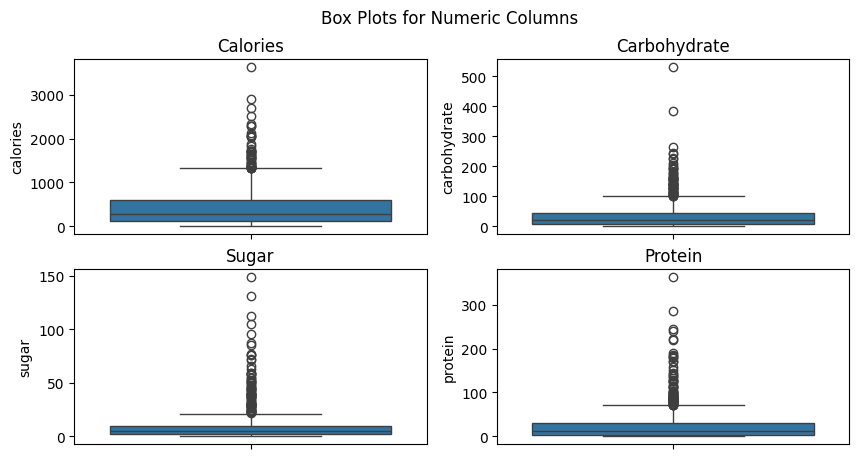

In [10]:
# Box plots for numeric columns
fig, ax = plt.subplots(2,2, figsize=(10, 5))
sns.boxplot(data=data['calories'], ax=ax[0,0])
sns.boxplot(data=data['carbohydrate'], ax=ax[0,1])
sns.boxplot(data=data['sugar'], ax=ax[1,0])
sns.boxplot(data=data['protein'], ax=ax[1,1])

fig.suptitle('Box Plots for Numeric Columns')
ax[0,0].set_title('Calories')
ax[0,1].set_title('Carbohydrate')
ax[1,0].set_title('Sugar')
ax[1,1].set_title('Protein')
plt.show()

There are just a few outliers that are far aabove the rest in each category. It could be a case where it's a fatty meal with 6 or more servings. We'll inspect the columne with these extreme values.

In [11]:
#Inspect extreme values
extreme_cal = data[data['calories'] > 2000]
extreme_cal

,calories,carbohydrate,sugar,protein,category,servings,high_traffic
recipe,,,,,,,
56,2122.24,25.99,0.52,81.37,Pork,1,High
72,2508.47,18.11,10.60,84.23,Chicken,4,NaN
98,2081.69,8.09,4.78,28.48,One Dish Meal,2,High
125,2906.01,3.52,1.89,179.22,Pork,6,High
227,2703.12,6.40,2.17,28.20,Pork,6,High
357,2282.60,4.50,4.16,31.19,One Dish Meal,4,High
398,2051.34,2.46,2.12,69.62,Chicken,2,High
637,2029.33,25.08,0.61,54.00,One Dish Meal,1,High
782,2068.07,34.23,1.46,10.02,Potato,1,High


It would be very rare for a 1 person meal to be 2000+ calories but it is understandable for a meal split between 2, 4, or 6 people to have that many calories as that would come out to about 1000 or less calories a meal. We'll remove the values from our original dataset with 1 serving and > 2000 cals

In [12]:
#Remove 1 serving extreme cals
data = data[~((data['calories'] > 2000) & (data['servings'] == 1))]

Now we'll do the same for the other columns

In [13]:
extreme_carb = data[data['carbohydrate'] > 300]
extreme_carb

,calories,carbohydrate,sugar,protein,category,servings,high_traffic
recipe,,,,,,,
350,94.27,383.06,5.98,39.61,Potato,1,High
451,182.76,530.42,5.80,5.01,Potato,4,High


Both these have more carbs than calories which isn't possible as carbs are 4 calories per gram. We'll look at all the values where there are more carbs than calories.

In [14]:
surplus_carb = data[data['carbohydrate']*4 > data['calories']]
surplus_carb

,calories,carbohydrate,sugar,protein,category,servings,high_traffic
recipe,,,,,,,
2,35.48,38.56,0.66,0.92,Potato,4,High
4,97.03,30.56,38.63,0.02,Beverages,4,High
7,183.94,47.95,9.75,46.71,Chicken Breast,4,NaN
14,25.23,11.51,10.32,9.57,Vegetable,4,High
21,9.26,17.44,8.16,10.81,Potato,6,High
...,...,...,...,...,...,...,...
923,27.65,31.14,3.60,8.66,Potato,4,High
929,5.87,47.91,30.06,24.72,Meat,4,High
932,110.17,65.70,58.15,5.92,Dessert,1,High


In [15]:
surplus_protein = data[data['protein']*4 > data['calories']]
surplus_protein

,calories,carbohydrate,sugar,protein,category,servings,high_traffic
recipe,,,,,,,
7,183.94,47.95,9.75,46.71,Chicken Breast,4,NaN
10,248.28,48.54,3.99,113.85,Chicken,2,NaN
14,25.23,11.51,10.32,9.57,Vegetable,4,High
16,316.45,2.65,4.68,79.71,Meat,6,High
21,9.26,17.44,8.16,10.81,Potato,6,High
...,...,...,...,...,...,...,...
906,42.30,12.14,1.86,87.25,Chicken Breast,2,NaN
923,27.65,31.14,3.60,8.66,Potato,4,High
929,5.87,47.91,30.06,24.72,Meat,4,High


In [16]:
surplus_sugar = data[data['sugar']*4 > data['calories']]
surplus_sugar

,calories,carbohydrate,sugar,protein,category,servings,high_traffic
recipe,,,,,,,
4,97.03,30.56,38.63,0.02,Beverages,4,High
14,25.23,11.51,10.32,9.57,Vegetable,4,High
21,9.26,17.44,8.16,10.81,Potato,6,High
22,40.53,87.91,104.91,11.93,Dessert,4,NaN
47,69.01,39.17,39.54,0.17,Beverages,4,NaN
...,...,...,...,...,...,...,...
877,25.21,0.47,20.64,52.56,Pork,2,High
917,64.27,0.16,51.64,0.74,Beverages,2,NaN
929,5.87,47.91,30.06,24.72,Meat,4,High


In [17]:
#extract data of all surpluses
surplus_data = pd.concat([surplus_carb, surplus_protein, surplus_sugar])
surplus_data

,calories,carbohydrate,sugar,protein,category,servings,high_traffic
recipe,,,,,,,
2,35.48,38.56,0.66,0.92,Potato,4,High
4,97.03,30.56,38.63,0.02,Beverages,4,High
7,183.94,47.95,9.75,46.71,Chicken Breast,4,NaN
14,25.23,11.51,10.32,9.57,Vegetable,4,High
21,9.26,17.44,8.16,10.81,Potato,6,High
...,...,...,...,...,...,...,...
877,25.21,0.47,20.64,52.56,Pork,2,High
917,64.27,0.16,51.64,0.74,Beverages,2,NaN
929,5.87,47.91,30.06,24.72,Meat,4,High


This is nearly half of the data! In a real world scenario **I WOULD NOT RECOMMEND proceeding with this study**. There are vast inaccuracies and fixing these all would make the results of our study unreliable.

For the sake of the experiment, we will ignore these inaccuracies and only fix the extreme outliers.

In [18]:
#Remove extreme carbs
data = data[data['carbohydrate'] < 300]

We will remove each of the extreme carb values as they are most likely inaccurate.

In [19]:
extreme_sugar = data[data['sugar'] > 100]
extreme_sugar

,calories,carbohydrate,sugar,protein,category,servings,high_traffic
recipe,,,,,,,
22,40.53,87.91,104.91,11.93,Dessert,4,NaN
291,239.90,51.13,131.39,3.38,Dessert,2,High
541,60.62,140.98,148.75,5.53,Dessert,1,NaN
576,128.30,210.77,112.24,13.02,Dessert,4,NaN


In this case, we will remove recipe 22 and recipe 541 as these two have more than double the amount of sugar to calories. Recipe 541 is also just 1 serving where this sugar amount is more understandable for desserts for 2-4 people.

In [20]:
#Remove recipe 22 & 541
data = data.drop([22, 541], errors='ignore')

In [21]:
extreme_protein = data[data['protein'] > 200]
extreme_protein

,calories,carbohydrate,sugar,protein,category,servings,high_traffic
recipe,,,,,,,
30,164.76,33.58,17.87,220.14,One Dish Meal,2,High
343,111.10,37.55,6.60,239.57,Lunch/Snacks,2,NaN
384,708.64,45.44,4.55,221.91,Chicken Breast,6,High
682,339.38,5.75,10.19,363.36,Chicken Breast,6,High
696,891.11,15.20,1.50,286.97,Chicken,2,NaN
862,1646.67,9.42,5.12,245.57,Chicken Breast,6,High


Most of these look like they could be accurate given that chicken is high in protein and the servings are around 6. We'll drop recipe 30 and 343 as the protein exceeds calories

In [22]:
#remove extreme protiens
data = data.drop([30, 343])

Now that we have cleaned these outliers, we can see how that affected the summary stats.

In [23]:
data.describe()

,calories,carbohydrate,sugar,protein,servings
count,885.000000,885.000000,885.000000,885.000000,885.000000
mean,430.462802,33.989932,8.814169,23.629503,3.476836
std,440.006667,38.996366,13.601812,35.145433,1.732304
min,0.140000,0.030000,0.010000,0.000000,1.000000
25%,110.690000,8.320000,1.690000,3.150000,2.000000
50%,288.600000,21.190000,4.550000,10.750000,4.000000
75%,595.390000,44.800000,9.800000,29.670000,4.000000
max,3633.160000,265.090000,131.390000,363.360000,6.000000


In comparison to earlier, the mean dropped slightly for all categories (outside of servings)

##Handle Missing Values

Now we can explore the missing values. First, we'll look at the numeric columns. Since we know there are 52 missing values, we can examine the occurences of this

In [24]:
#Analyze missing values
missing_rows = data[data[['calories', 'carbohydrate', 'sugar', 'protein']].isnull().any(axis=1)]
missing_rows

,calories,carbohydrate,sugar,protein,category,servings,high_traffic
recipe,,,,,,,


We can see these vary in serving size and category. We'll review how much this affects the calories, carbs, sugars, and protein counts.

In [25]:
#summary stats by category
cat_means = data.groupby('category').mean(numeric_only=True)
cat_medians = data.groupby('category').median(numeric_only=True)

print("Mean: \n", cat_means, "\n")
print("Median: \n", cat_medians)

Mean: 
                   calories  carbohydrate      sugar    protein  servings
category                                                                
Beverages       177.732174     15.955978  12.537283   0.594783  3.434783
Breakfast       331.880000     39.711698   7.552264  16.957170  3.207547
Chicken         566.732029     30.751304   5.678261  41.843913  3.289855
Chicken Breast  540.338511     21.833191   5.098723  52.161383  3.425532
Dessert         359.424133     54.094267  32.785733   5.680667  3.586667
Lunch/Snacks    483.388642     42.886049   5.293210  16.895432  3.493827
Meat            584.533784     22.159595   5.813649  40.377027  3.500000
One Dish Meal   535.509688     51.711875   5.948125  32.790625  3.171875
Pork            608.978472     28.105139   8.144583  43.275833  3.638889
Potato          411.694875     48.484625   3.692875   8.212750  3.875000
Vegetable       245.014872     23.679359   5.065128   7.891923  3.666667 

Median: 
                 calories  carbo

We see a wide range of numbers for both the mean and median based on category. We'll factor this in when imputing the missing data.

In [26]:
#Mean/median by serving size
serving_means = data.groupby('servings').mean(numeric_only=True)
serving_medians = data.groupby('servings').median(numeric_only=True)

print("Mean: \n", serving_means, "\n")
print("Median: \n", serving_medians)

Mean: 
             calories  carbohydrate     sugar    protein
servings                                               
1         454.045092     32.463681  8.228528  24.814049
2         419.443140     35.873605  9.356570  23.571919
4         428.068000     34.602658  8.917315  22.621288
6         424.655081     32.374486  8.622378  24.628541 

Median: 
           calories  carbohydrate  sugar  protein
servings                                        
1          333.010         21.67  4.080    12.12
2          318.825         22.53  4.115     8.46
4          264.130         21.98  4.710    11.99
6          291.640         18.58  4.790     8.77


These numbers are much more similar so have little impace on the numeric data. We'll impute missing values using median for each category.

In [27]:
#impute missing numeric
for index, row in missing_rows.iterrows():
    category = row['category']
    if category in cat_medians.index:
        for col in ['calories', 'carbohydrate', 'sugar', 'protein']:
            if pd.isna(row[col]):
                #replace with median from category
                data.loc[index, col] = cat_medians.loc[category, col]

In [28]:
#check missing numeric data
data[['calories', 'carbohydrate', 'sugar', 'protein']].isnull().sum()

,0
calories,0
carbohydrate,0
sugar,0
protein,0


Now that we have handled the missing numeric data, we will adjust the missing High traffic. I suspect these are just meant to be false.

In [29]:
data['high_traffic'].value_counts()

,count
high_traffic,
High,528


Since High is the only result, all null values then would be false. We'll make this a boolean column with True/False values instead of High/NAN

In [30]:
#Impute high_traffic to true/false
data['high_traffic'] = data['high_traffic'].fillna(False)
data['high_traffic'] = data['high_traffic'].astype(bool)

In [31]:
data['high_traffic'].value_counts()

,count
high_traffic,
True,528
False,357


Now that we have the data cleaned and prepared, we can start EDA.

# EDA

The goal of this project is to predict what recipes will drive high traffic. For EDA, we'll focus on high traffic as the dependent variable.

First, we'll analyze the numeric features.

##Numeric Features

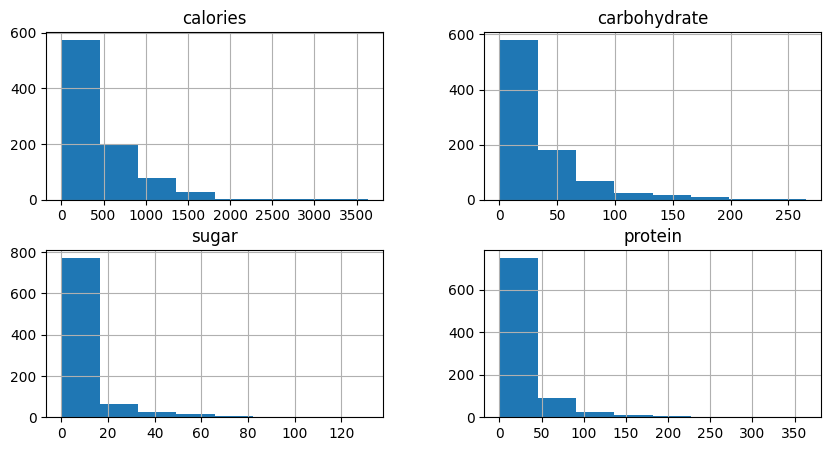

In [32]:
#Analyze numeric features
numeric_features = ['calories', 'carbohydrate', 'sugar', 'protein']

data[numeric_features].hist(figsize=(10, 5), bins=8)
plt.show()

As we saw in the box plot earlier, we can see most of these results are skewed to the right.

##Categorical Features

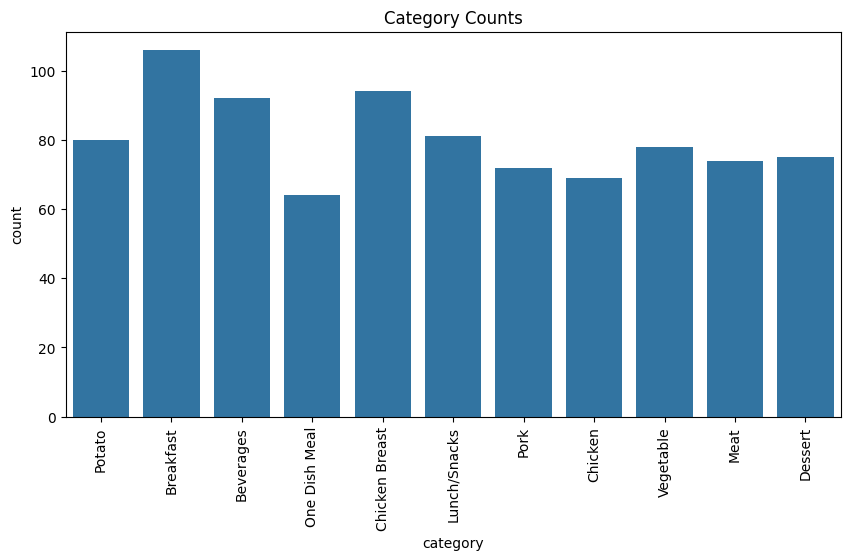

In [33]:
#plot categories
plt.figure(figsize=(10, 5))
sns.countplot(data=data, x='category')
plt.xticks(rotation=90)
plt.title('Category Counts')
plt.show()

The most frequent categories are Chicken and Breakfast. The categories are all pretty evenly distributedwith breakfast being the only one over 100 and most others between 60-80.

We'll also look at servings as there were only 4 serving sizes listed.

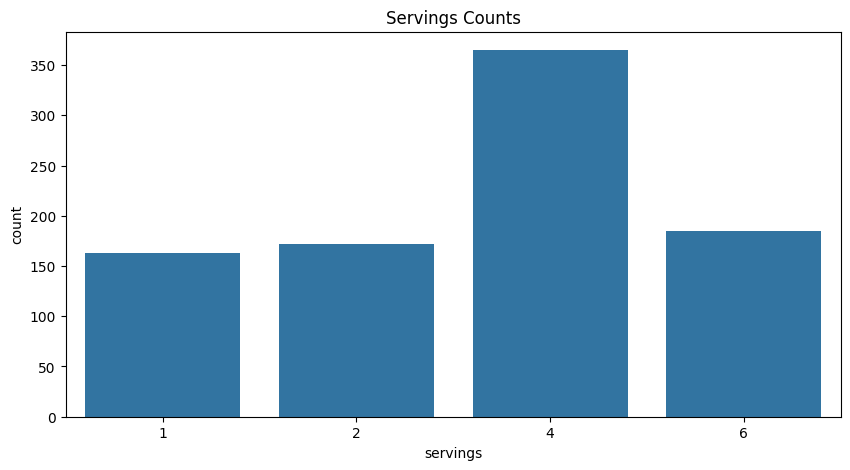

In [34]:
#plot servings
plt.figure(figsize=(10, 5))
sns.countplot(data=data, x='servings')
plt.title('Servings Counts')
plt.show()

Most of our recipes are designed for 4 servings while 1, 2, and 6 servings are about 150 each.

##Numerical features vs High Traffic

Now we'll see how our features correlate to high traffic.

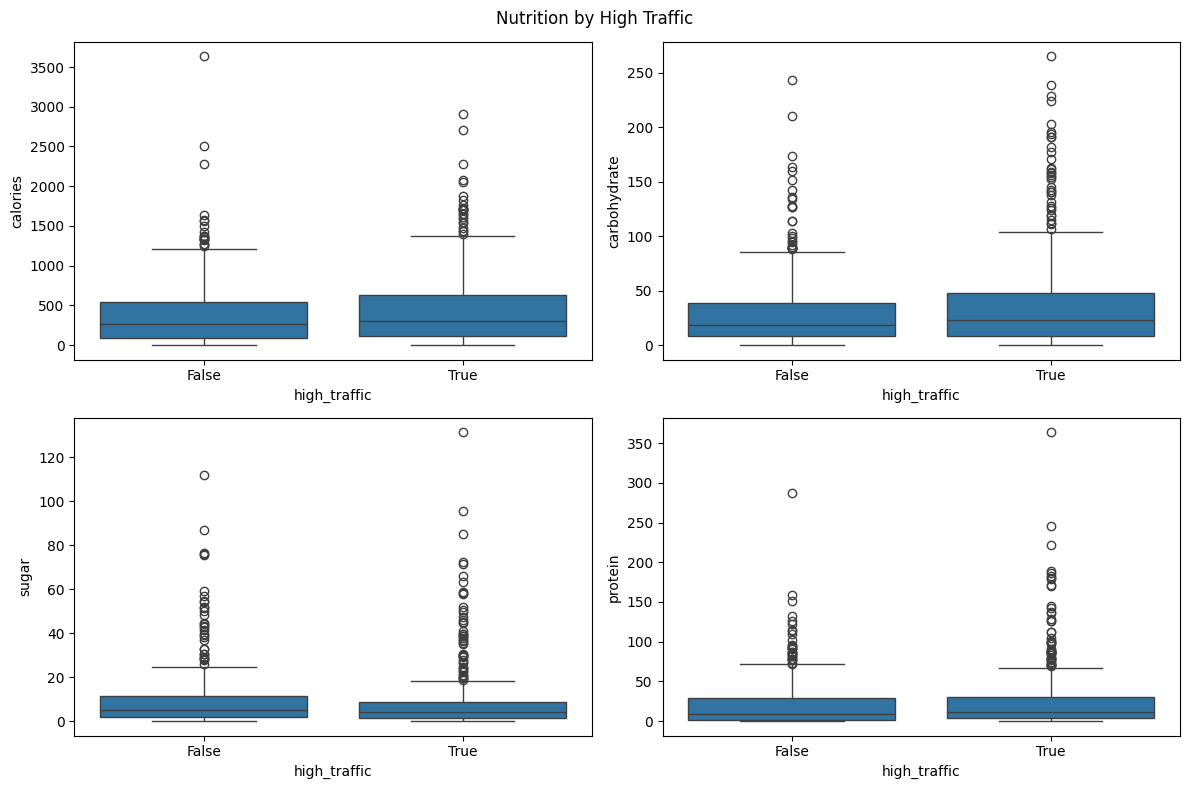

In [35]:
#Plot numerical features w/ high traffic
fig, ax = plt.subplots(2,2, figsize=(12, 8))
sns.boxplot(x=data['high_traffic'], y=data['calories'], ax=ax[0,0])
sns.boxplot(x=data['high_traffic'], y=data['carbohydrate'], ax=ax[0,1])
sns.boxplot(x=data['high_traffic'], y=data['sugar'], ax=ax[1,0])
sns.boxplot(x=data['high_traffic'], y=data['protein'], ax=ax[1,1])
fig.suptitle('Nutrition by High Traffic')
plt.tight_layout()
plt.show()

We don't see any strong correlations with the numeric features. There are slight differences in the median and IQR for calories, carbs, and sugar but nothing that is very significant. Protein is neraly identical for high traffic and non high traffic.

This gives us little indication that these features have a strong contribution to traffic.

##Categorical vs high traffic

Now we'll analyze how the cateogires affect high traffic.

In [36]:
cat_traffic = pd.crosstab(data['high_traffic'], data['category'])
cat_traffic

category,Beverages,Breakfast,Chicken,Chicken Breast,Dessert,Lunch/Snacks,Meat,One Dish Meal,Pork,Potato,Vegetable
high_traffic,,,,,,,,,,,
False,87,73,44,50,27,29,18,16,7,5,1
True,5,33,25,44,48,52,56,48,65,75,77


We can see some strong correlations here with high ratios of high traffic for One dish meal, Pork, Potato, and vegetable and low ratios of high traffic in beverages, and breakfast.

Let's visualize this in a bar plot.

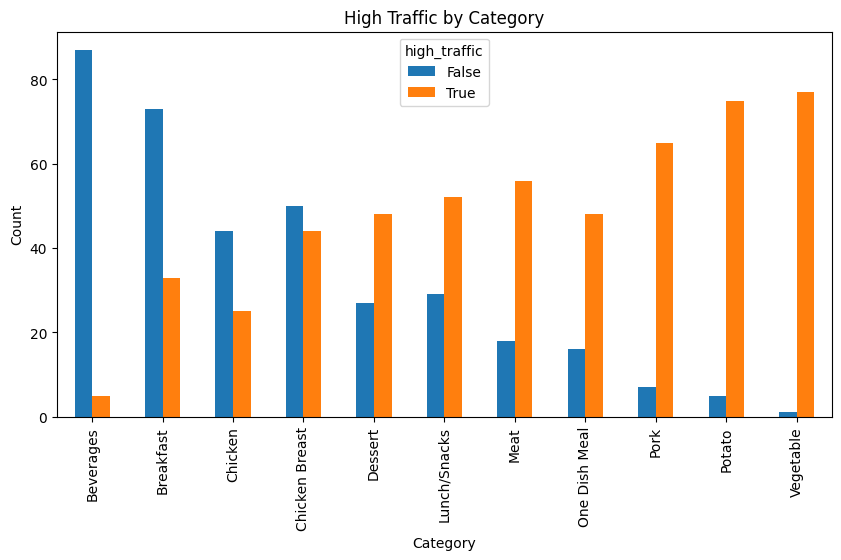

In [37]:
#Bar plot of categories vs high traffic
#transpose to put catgories on X axis
cat_traffic = cat_traffic.T

cat_traffic.plot(kind='bar', figsize=(10, 5))
plt.xticks(rotation=90)
plt.xlabel('Category')
plt.ylabel('Count')
plt.title('High Traffic by Category')
plt.show()

We can see the vast differences here in high traffic for each category. Meat, One dish, Pork, Potato, and Vegetable more than double high traffic to not high traffic. These will most likely be categories we focus on when looking to drive high traffic.

On the inverse, beverages, breakfast, and chicken heavily favor not high traffic. These will most likely be categories to avoid.

We'll do the same thing for serving size to see if this has any influence.

In [38]:
#crosstab
serving_traffic = pd.crosstab(data['servings'], data['high_traffic'])
serving_traffic

high_traffic,False,True
servings,,
1,69,94
2,75,97
4,146,219
6,67,118


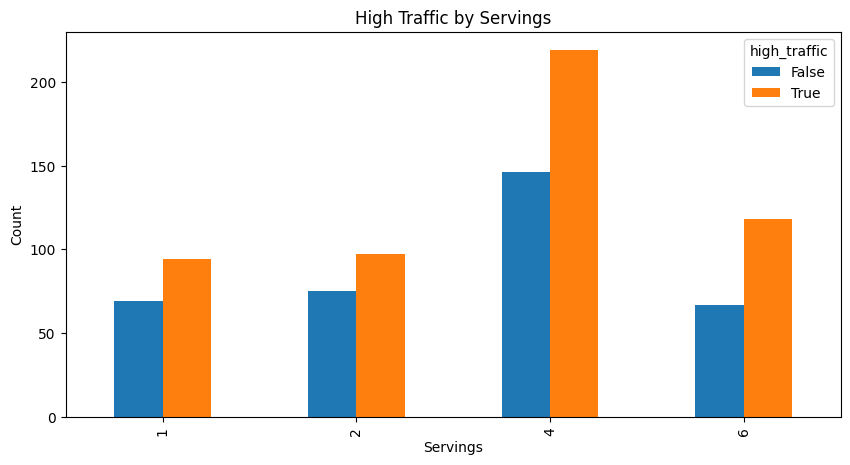

In [39]:
#Bar plot
serving_traffic.plot(kind='bar', figsize=(10, 5))
plt.xlabel('Servings')
plt.ylabel('Count')
plt.title('High Traffic by Servings')
plt.show()

All serving sizes lean more towards True but there is no strong correlation that is leading to more traffic.

Since categories had the strongest correlation, we'll dive into this deeper by combining other features in the bar chart. First we'll look at calories.

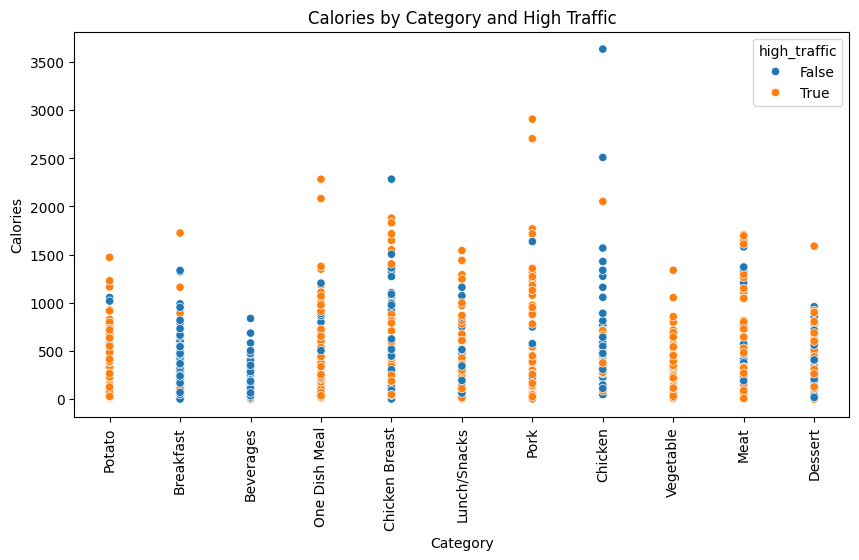

In [40]:
#scatter plot by category/calories
plt.figure(figsize=(10, 5))
sns.scatterplot(data=data, x='category', y='calories', hue='high_traffic')
plt.xticks(rotation=90)
plt.xlabel('Category')
plt.ylabel('Calories')
plt.title('Calories by Category and High Traffic')
plt.show()

This shows the average calorie content of recipes within each category, split generating high or not high traffic. Average calorie levels are similar between high and not high traffic, reinforcing the earlier finding that this doesn't have much correlation with high traffic. This also shows that high traffic doesn't correlate to categories with higher/lower calories. We see both beverages, which had a low ratio, and vegetable, which had a very high ratio, had similar calorie counts.

##Summary
Based on this exploratory analysis, we see that recipe category will be the strongest indicator for website traffic. Vegetables, Pork, Potato, One Dish Meal, and Meat had the highest ratios of high traffic. Beverages, Breakfast, and Chicken had the lowest ratios of high traffic.

This suggests that a classification model focused on categorical features may be effective in predicting high-traffic outcomes. We'll try Logisitc Regression and Random Forest as these are both good for binary classification.

# Preprocessing

Before modeling, we'll encode the category feature using One Hot Encoder

In [41]:
#OHE
cat_encoded = pd.get_dummies(data['category'], drop_first=False)
cat_encoded.head()

,Beverages,Breakfast,Chicken,Chicken Breast,Dessert,Lunch/Snacks,Meat,One Dish Meal,Pork,Potato,Vegetable
recipe,,,,,,,,,,,
2,False,False,False,False,False,False,False,False,False,True,False
3,False,True,False,False,False,False,False,False,False,False,False
4,True,False,False,False,False,False,False,False,False,False,False
5,True,False,False,False,False,False,False,False,False,False,False
6,False,False,False,False,False,False,False,True,False,False,False


In [44]:
#Update cat_encoded to 0/1 values for false and true
cat_encoded = cat_encoded.astype(int)
cat_encoded.head()

,Beverages,Breakfast,Chicken,Chicken Breast,Dessert,Lunch/Snacks,Meat,One Dish Meal,Pork,Potato,Vegetable
recipe,,,,,,,,,,,
2,0,0,0,0,0,0,0,0,0,1,0
3,0,1,0,0,0,0,0,0,0,0,0
4,1,0,0,0,0,0,0,0,0,0,0
5,1,0,0,0,0,0,0,0,0,0,0
6,0,0,0,0,0,0,0,1,0,0,0


Now we'll update the high traffic column to 0 and 1 for False and True

In [45]:
#Update high_traffic
data['high_traffic'] = data['high_traffic'].astype(int)

We'll add the encoded categories to replace the current category column

In [46]:
#Replace category w/ encoded
data = pd.concat([data.drop(columns=['category']), cat_encoded], axis=1)

data.head()

,calories,carbohydrate,sugar,protein,servings,high_traffic,Beverages,Breakfast,Chicken,Chicken Breast,Dessert,Lunch/Snacks,Meat,One Dish Meal,Pork,Potato,Vegetable
recipe,,,,,,,,,,,,,,,,,
2,35.48,38.56,0.66,0.92,4,1,0,0,0,0,0,0,0,0,0,1,0
3,914.28,42.68,3.09,2.88,1,0,0,1,0,0,0,0,0,0,0,0,0
4,97.03,30.56,38.63,0.02,4,1,1,0,0,0,0,0,0,0,0,0,0
5,27.05,1.85,0.80,0.53,4,0,1,0,0,0,0,0,0,0,0,0,0
6,691.15,3.46,1.65,53.93,2,1,0,0,0,0,0,0,0,1,0,0,0


Now that we have all numeric values, we can split this into train/test sets before modeling

##Split into train/test sets

In [47]:
X = data.drop(columns=['high_traffic'])
y = data['high_traffic']

from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Modeling

As mentioned previously we'll use Logistic Regression and Random Forest to aim to get 80% accuracy.

##Logistic Regression

In [48]:
#Import & Instantiate model
from sklearn.linear_model import LogisticRegression
logreg = LogisticRegression()

#Fit on training data
logreg.fit(X_train, y_train)

#Predict
y_pred = logreg.predict(X_test)

/usr/local/lib/python3.12/dist-packages/sklearn/linear_model/_logistic.py:465: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. OF ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


Since we got a convergence warning, we will need to scale the features. First, we'll evaluate how this model performed.

In [50]:
#Import evaluation metrics
from sklearn.metrics import classification_report, confusion_matrix, ConfusionMatrixDisplay

#Evaluate logreg model
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.67      0.59      0.63        69
           1       0.76      0.81      0.79       108

    accuracy                           0.73       177
   macro avg       0.72      0.70      0.71       177
weighted avg       0.72      0.73      0.73       177



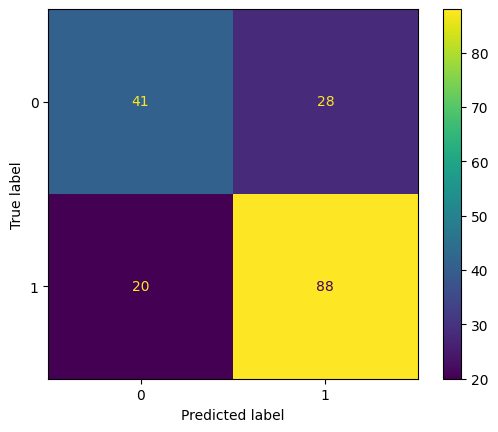

In [59]:
#Confustion matrix for visualization
cm = confusion_matrix(y_test, y_pred)
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=logreg.classes_)
disp.plot()
plt.show()

The model achieves a recall of 81% for high-traffic recipes, meeting the requirement of correctly identifying popular recipes at least 80% of the time. This comes with a precision of 76%, meaning that some low-traffic recipes would still be promoted. Performance on low-traffic recipes is weaker, with a recall of 59%, reflecting a deliberate tradeoff to prioritize identifying popular content. Overall accuracy is 73%, which is reasonable given the emphasis on recall rather than balanced classification.

In [51]:
#Scale features
from sklearn.preprocessing import RobustScaler
scaler = RobustScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

Now we will fit the model using this data and see if the model improves

In [54]:
#Instantiate & Fit to logreg model
logreg2 = LogisticRegression()
logreg2.fit(X_train_scaled, y_train)

#Predict
y_pred_scaled = logreg2.predict(X_test_scaled)

In [55]:
#Evaluate model
print(classification_report(y_test, y_pred_scaled))

              precision    recall  f1-score   support

           0       0.67      0.59      0.63        69
           1       0.76      0.81      0.79       108

    accuracy                           0.73       177
   macro avg       0.72      0.70      0.71       177
weighted avg       0.72      0.73      0.73       177



This returned the exact same results as the first model, showing us that scaling did not have any impact on the overall model performance.

##Random Forest

We'll use a Random Forest model as this will handle categorical dominance which we have in this data

In [56]:
#Import & Instantiate model
from sklearn.ensemble import RandomForestClassifier
rf = RandomForestClassifier()

#Fit to data
rf.fit(X_train, y_train)

#Predict
y_pred_rf = rf.predict(X_test)

Now we'll evaluate the model using a classification report and confusion matrix

In [57]:
print(classification_report(y_test, y_pred_rf))

              precision    recall  f1-score   support

           0       0.63      0.57      0.60        69
           1       0.74      0.79      0.76       108

    accuracy                           0.70       177
   macro avg       0.68      0.68      0.68       177
weighted avg       0.70      0.70      0.70       177



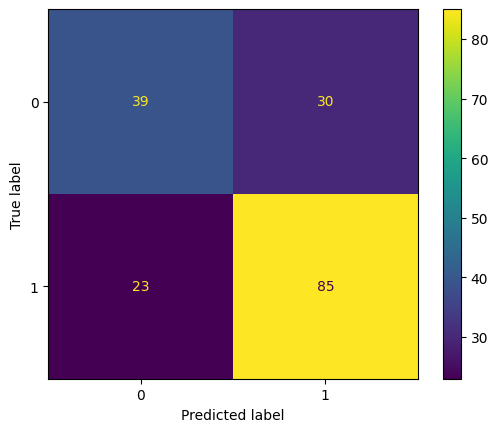

In [60]:
#Confusion matrix
cm2 = confusion_matrix(y_test, y_pred_rf)
disp = ConfusionMatrixDisplay(confusion_matrix=cm2, display_labels=rf.classes_)
disp.plot()
plt.show()

The model achieves a recall of 79% for high-traffic recipes, which is slightly under our requirement of 80%. This comes with a precision of 74%, which is also less than the Logistic Regression model meaning slightly more low-traffic recipes would be promoted.

# Conclusion

## ✅ When you have finished...
-  Publish your Workspace using the option on the left
-  Check the published version of your report:
	-  Can you see everything you want us to grade?
    -  Are all the graphics visible?
-  Review the grading rubric. Have you included everything that will be graded?
-  Head back to the [Certification Dashboard](https://app.datacamp.com/certification) to submit your practical exam report and record your presentation